In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [30]:
df = pd.read_csv("dados_fraude.csv")

In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [32]:
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [5]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [6]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

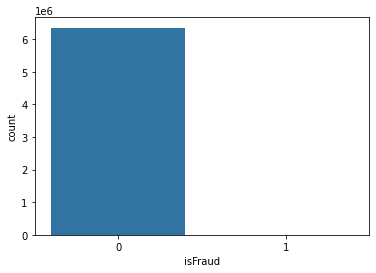

In [7]:
ax = sns.countplot(x="isFraud", data=df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [33]:
df["type"] = df["type"].map({"CASH_OUT":0,"PAYMENT":1, "CASH_IN":2, "TRANSFER":3, "DEBIT":4})

In [11]:
X = df.drop("isFraud", axis = 1)
y = df.isFraud

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.9981994838604222

In [17]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588602
           1       0.34      0.41      0.37      2053

    accuracy                           1.00   1590655
   macro avg       0.67      0.71      0.69   1590655
weighted avg       1.00      1.00      1.00   1590655



In [18]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito        0     1      All
Real                           
0        1586940  1662  1588602
1           1202   851     2053
All      1588142  2513  1590655


In [19]:
nr = NearMiss()

In [20]:
X, y = nr.fit_resample(X, y)

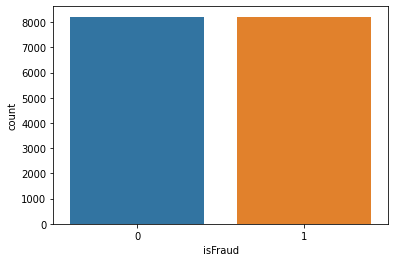

In [21]:
ax = sns.countplot(x=y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

c:\users\fabioclericuzi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.9941563184806428

In [27]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2053
           1       1.00      0.99      0.99      2054

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107



In [28]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        2046     7  2053
1          17  2037  2054
All      2063  2044  4107


In [34]:
X = df.drop("isFraud", axis = 1)
y = df.isFraud

In [35]:
np.bincount(y)

array([6354407,    8213], dtype=int64)

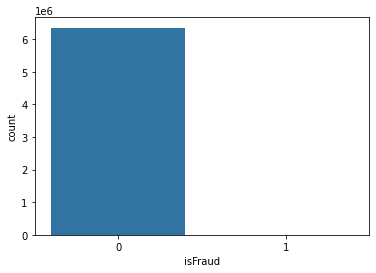

In [36]:
ax = sns.countplot(x=y)

In [37]:
smt = SMOTE(sampling_strategy=0.5)

In [38]:
X, y = smt.fit_resample(X, y)

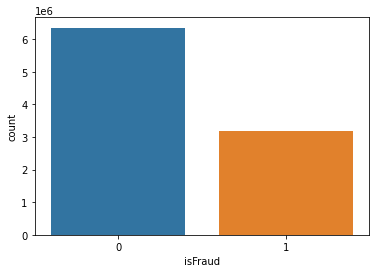

In [39]:
ax = sns.countplot(x=y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.9171523137954

In [48]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94   1588602
           1       0.90      0.85      0.87    794301

    accuracy                           0.92   2382903
   macro avg       0.91      0.90      0.91   2382903
weighted avg       0.92      0.92      0.92   2382903



In [49]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito        0       1      All
Real                             
0        1512383   76219  1588602
1         121199  673102   794301
All      1633582  749321  2382903
